In [27]:
import csv

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'hand_landmarks.csv'
#model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
#tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'
model_save_path = 'new_hand_classifier.hdf5'
tflite_save_path = 'new_hand_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 26

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape((21, 2, 1), input_shape=(21 * 2, )),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 1), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 1)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 1), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 21, 2, 1)          0         
                                                                 
 conv2d (Conv2D)             (None, 21, 2, 32)         128       
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 2, 32)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 2, 64)         6208      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 2, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 640)               0

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


29/29 [==============================] - ETA: 0s - loss: 2.9447 - accuracy: 0.1642
Epoch 1: saving model to new_hand_classifier.hdf5
29/29 [==============================] - 2s 20ms/step - loss: 2.9447 - accuracy: 0.1642 - val_loss: 2.1617 - val_accuracy: 0.3583
Epoch 2/1000
21/29 [====================>.........] - ETA: 0s - loss: 1.9699 - accuracy: 0.3575

C:\gesture_recognition_by_image\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to new_hand_classifier.hdf5
29/29 [==============================] - 0s 8ms/step - loss: 1.8630 - accuracy: 0.3881 - val_loss: 1.0551 - val_accuracy: 0.8158
Epoch 3/1000
27/29 [==========================>...] - ETA: 0s - loss: 1.1125 - accuracy: 0.6427
Epoch 3: saving model to new_hand_classifier.hdf5
29/29 [==============================] - 0s 9ms/step - loss: 1.1042 - accuracy: 0.6433 - val_loss: 0.4686 - val_accuracy: 0.9542
Epoch 4/1000
26/29 [=========================>....] - ETA: 0s - loss: 0.6247 - accuracy: 0.7942
Epoch 4: saving model to new_hand_classifier.hdf5
29/29 [==============================] - 0s 9ms/step - loss: 0.6145 - accuracy: 0.7986 - val_loss: 0.2035 - val_accuracy: 0.9542
Epoch 5/1000
24/29 [=======================>......] - ETA: 0s - loss: 0.3783 - accuracy: 0.8802
Epoch 5: saving model to new_hand_classifier.hdf5
29/29 [==============================] - 0s 9ms/step - loss: 0.3708 - accuracy: 0.8811 - val_loss: 0.0957 - val_accuracy: 0.

In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 2ms/step - loss: 1.7126e-07 - accuracy: 1.0000


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 107ms/step
[2.1835730e-33 1.1306646e-17 1.0000000e+00 3.8696211e-16 7.5757285e-20
 1.5274972e-21 1.7150357e-20 9.2796296e-22 3.0985720e-19 3.1849748e-36
 3.3862553e-34 2.1094836e-18 8.1487655e-22 2.5122662e-29 2.6250126e-12
 6.3172469e-25 6.7809724e-29 2.9137440e-38 1.3114507e-37 1.2543319e-33
 6.2892312e-26 4.6110409e-23 2.7413825e-35 4.4012011e-28 5.6007571e-35
 3.1588658e-27]
2


# Confusion matrix

38/38 [==============================] - 0s 3ms/step


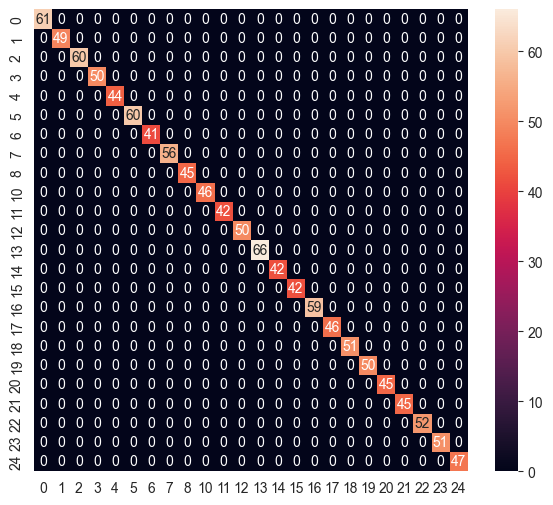

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        44
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        41
           7       1.00      1.00      1.00        56
           8       1.00      1.00      1.00        45
          10       1.00      1.00      1.00        46
          11       1.00      1.00      1.00        42
          12       1.00      1.00      1.00        50
          13       1.00      1.00      1.00        66
          14       1.00      1.00      1.00        42
          15       1.00      1.00      1.00        42
          16       1.00      1.00      1.00        59
          17       1.00      1.00      1.00        46
     

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\gesture_recognition_by_image\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\joren\AppData\Local\Temp\tmppq9aqvuf\assets


INFO:tensorflow:Assets written to: C:\Users\joren\AppData\Local\Temp\tmppq9aqvuf\assets


105472

# Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 7 ms


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.06449630e-33 1.08693055e-17 1.00000000e+00 4.51129218e-16
 8.45601085e-20 1.54178126e-21 1.77303062e-20 8.61420155e-22
 3.60941036e-19 3.26605552e-36 2.86881646e-34 1.77953061e-18
 9.04125272e-22 2.61782961e-29 2.61409037e-12 7.32654023e-25
 6.80564059e-29 3.07084189e-38 1.39029199e-37 1.25044277e-33
 6.91358992e-26 4.42489815e-23 2.12984954e-35 4.41078113e-28
 5.66621453e-35 3.52062305e-27]
2


In [24]:
# Save the model
model.save(model_save_path, include_optimizer=False)

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Write the TFLite file
with open(tflite_save_path, 'wb') as f:
    f.write(tflite_quantized_model)

C:\gesture_recognition_by_image\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\joren\AppData\Local\Temp\tmpfn26pqmn\assets


INFO:tensorflow:Assets written to: C:\Users\joren\AppData\Local\Temp\tmpfn26pqmn\assets


#### Loss  (cost)

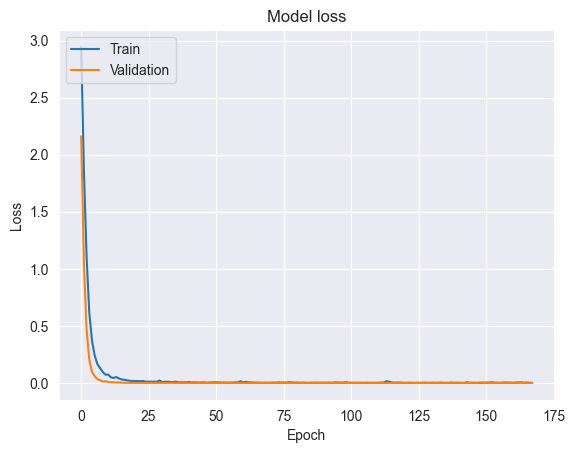

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

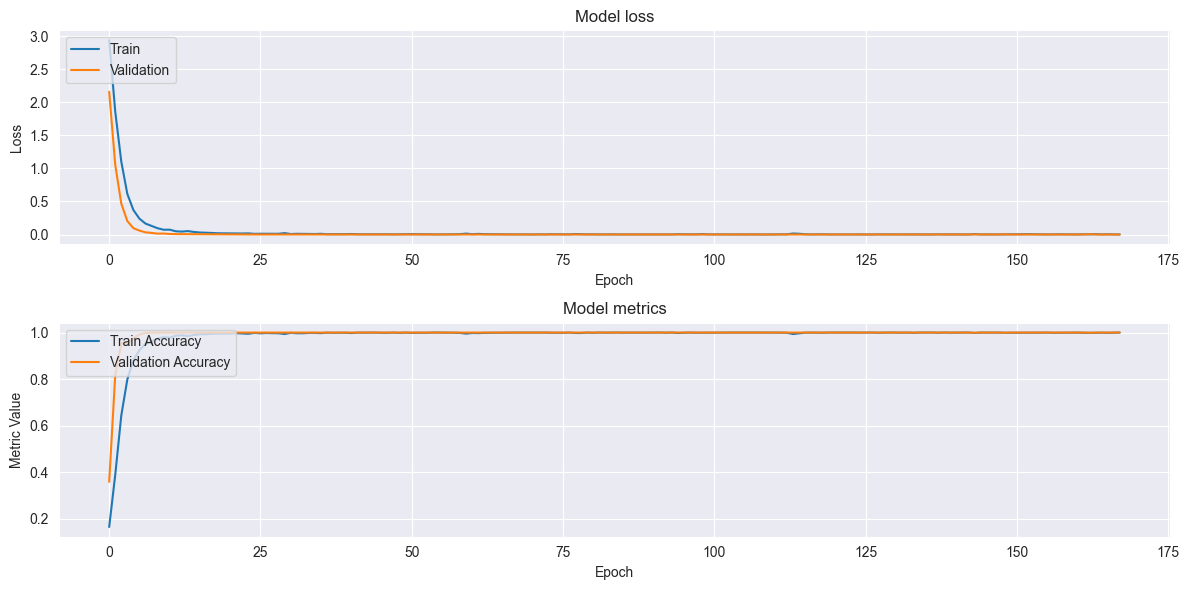

In [30]:
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy and F1 score values
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model metrics')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend(['Train Accuracy', 'Validation Accuracy', 'F1 Score'], loc='upper left')

plt.tight_layout()
plt.show()

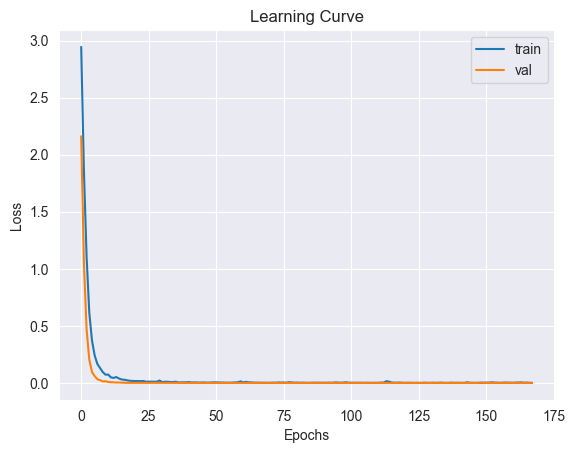

In [32]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()